In [1]:
import glob
import io
import math
import os
import scipy

from __future__ import print_function
import keras
import tensorflow as tf
from keras import backend as K
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.externals import joblib

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


/home/arina/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

In [3]:
json_file = open('DNN_altModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
DNN_model = model_from_json(loaded_model_json)
DNN_model.load_weights("DNN-altModel-best.h5")
 
DNN_model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])


In [4]:
RF_model = joblib.load('RF_altModel.pkl')

In [5]:
test_df = pd.read_csv(
    io.open("/home/arina/Kenji_proj/Kinase/test/test_compl_descr.tab", "r"), sep="\t")

np.random.seed(4)
test_df = test_df.reindex(np.random.permutation(test_df.index))
names = test_df.Compl
test_df = test_df.drop(['tarPair','Compl'],axis=1)

In [6]:
test_df

,Comp,minimizedAffinity,ICM_hbonds,ICM_area,gauss_o0_w0_5_c8_,repulsion_o0_c8_,hydrophobic_g0_5_b1_5_c8_,non_hydrophobic_g0_5_b1_5_c8_,vdw_i6_j12_s1_100_c8_,non_dir_h_bond_lj_o_0_7_100_c8_,...,TOTAL_EELEC,TOTAL_SOLV,POLAR_SOLV,NONPOLAR_SOLV,COULOMB,prTar,APF_score,Seq,APF_sim,Seq_distance
303,v103904189,-9.8,0,278.1,128.7,180.2,12.1,176.2,579.2,160.4,...,-954.3,-22.2,-25.0,2.8,-932.1,4F9C,-325.9,46.7,0.3,1.0
18,v103904189,-9.0,4,265.8,56.3,55.9,18.5,75.6,-106.5,-5.9,...,-954.3,-22.2,-25.0,2.8,-932.1,4F9C,-274.9,39.4,0.4,1.0
241,v103904190,-8.3,2,254.0,197.1,297.0,103.7,167.3,722.7,67.1,...,-1056.3,-17.7,-20.7,3.0,-1038.5,4F9C,-253.0,48.2,0.2,1.0
308,v103904191,-8.0,3,227.2,87.6,353.3,62.3,72.5,2353.5,91.6,...,-485.1,-18.9,-21.3,2.4,-466.2,3NR9,-260.7,37.0,0.2,1.0
250,v103904190,-9.8,1,363.4,174.7,467.4,59.1,249.2,2453.5,557.1,...,-1056.3,-17.7,-20.7,3.0,-1038.5,4F9C,-236.2,41.6,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,v103904189,-8.8,2,291.7,73.9,216.3,17.4,107.7,1749.2,293.8,...,-954.3,-22.2,-25.0,2.8,-932.1,4F9C,-246.5,38.7,0.2,1.0
87,v103904189,-9.7,2,277.1,22.9,14.8,2.9,45.6,-97.6,88.5,...,-954.3,-22.2,-25.0,2.8,-932.1,4F9C,-256.1,40.3,0.3,1.0
197,v103904191,-8.3,2,215.2,75.0,73.6,17.6,70.1,-33.7,-7.7,...,-485.1,-18.9,-21.3,2.4,-466.2,3NR9,-289.9,40.5,0.3,1.0
174,v103904189,-9.8,2,316.8,73.4,90.4,24.1,81.8,265.1,96.6,...,-954.3,-22.2,-25.0,2.8,-932.1,4F9C,-502.0,299.9,1.0,0.0


In [7]:
for var in ['minimizedAffinity','nof_Atoms',
            'vdw_i6_j12_s1_100_c8_','non_dir_h_bond_lj_o_0_7_100_c8_',
            'non_dir_anti_h_bond_quadratic_o0_c8_','repulsion_o0_c8_',
            'non_dir_h_bond_g_0_7_b0_c8_','donor_donor_quadratic_o0_c8_',
            'acceptor_acceptor_quadratic_o0_c8_','electrostatic_i2_100_c8_',
            'ad4_solvation_d_sigma3_6_s_q0_01097_c8_','sc1','sc2','sc3',
            'scCons','xEnergy','ICM_hbonds','ICM_area','gauss_o0_w0_5_c8_',
            'H_bond','Hal_bond','Salt_Bridges','pi_Cation','pi_Stacking',
            'hydrophobic_g0_5_b1_5_c8_','non_hydrophobic_g0_5_b1_5_c8_',
            'gauss_o3_w2_c8_','TOTAL_EELEC','TOTAL_SOLV', 'POLAR_SOLV', 
            'NONPOLAR_SOLV','COULOMB']:
    test_df[var] = z_score_normalize(test_df[var])
 

In [8]:
test_df = test_df.drop(['prTar','Seq_distance','Seq','APF_score','APF_sim'], axis=1)

cat_features=test_df[['Tar']]
num_features=test_df.drop(cat_features, axis=1)
num_features=num_features.drop(['Comp','HR_1','HR_2','HR_3'], axis=1)
all_feat=test_df.drop(['Comp'],axis=1)


In [9]:
for feat in cat_features:
    test_df[feat] = pd.Categorical(test_df[feat])
    dfDummies = pd.get_dummies(test_df[feat], prefix = 'cat_'+str(feat))
    test_df = pd.concat([test_df, dfDummies], axis=1)
    test_df = test_df.drop(feat, axis=1)

In [10]:
hinge_cat=['cat_HR_1_0','cat_HR_1_1','cat_HR_1_2','cat_HR_2_0','cat_HR_2_1','cat_HR_2_2','cat_HR_2_3','cat_HR_3_0','cat_HR_3_1','cat_HR_3_2','cat_HR_3_3', 'cat_HR_3_4']

for col in hinge_cat:
    test_df[col]=0

for i in range(3):
    ii=test_df[test_df.HR_1==i].index.tolist()
    col='cat_HR_1_'+str(i)
    test_df[col][ii] = 1

for i in range(4):
    ii=test_df[test_df.HR_2==i].index.tolist()
    col='cat_HR_2_'+str(i)
    test_df[col][ii] = 1

for i in range(5):
    ii=test_df[test_df.HR_3==i].index.tolist()
    col='cat_HR_3_'+str(i)
    test_df[col][ii] = 1
    
test_df = test_df.drop(["Comp","HR_1","HR_2","HR_3"], axis=1)
    

/home/arina/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/arina/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/arina/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
for feat in num_features:
    test_df[feat] = test_df[feat].astype('float64')

In [12]:
print(test_df.shape, 'test samples')

(312, 150) test samples


In [13]:
test_df.fillna(0, inplace=True)

In [14]:
test_prediction_DNN = DNN_model.predict(np.array(test_df))
test_prediction_DNN = np.squeeze(test_prediction_DNN, axis=(1,))
test_prediction_RF = RF_model.predict(np.array(test_df))

In [15]:
pred_df=pd.DataFrame(data={'Compl': names, 'pred_DNN_noPrimTar': test_prediction_DNN, 'pred_RF_noPrimTar': test_prediction_RF})

In [16]:
pred_df.to_csv('test_prediction_noPrimTarModel.tab', sep='\t', index=False)

In [17]:
# If you have activity data to compare with load it here:
activ_df = pd.read_csv(
    io.open("/home/arina/Kenji_proj/Kinase/test/test_activ.tab", "r"), sep="\t")

In [18]:
merge_df=pd.merge(pred_df, activ_df, on='Compl')
merge_df

,Compl,pred_DNN_noPrimTar,pred_RF_noPrimTar,Activ
0,5MY8_v103904189,5.6,6.2,6.0
1,2C47_v103904189,6.0,6.4,6.2
2,5NKF_v103904191,5.8,5.8,5.8
3,2JDO_v103904189,5.6,6.4,5.3
4,2Y7J_v103904189,5.7,6.4,6.7
...,...,...,...,...
150,2WEL_v103904190,6.4,6.4,6.6
151,3R04_v103904189,5.7,6.5,6.0
152,3MPM_v103904190,6.5,6.7,5.5
153,2X4Z_v103904190,6.1,6.5,7.4


In [19]:
print(scipy.stats.pearsonr(merge_df.pred_DNN_noPrimTar, merge_df.Activ) )

(0.268606581273636, 0.0007264969189684495)


In [20]:
print(scipy.stats.pearsonr(merge_df.pred_RF_noPrimTar, merge_df.Activ) )

(0.4516949284260262, 3.6507646017124638e-09)


/home/arina/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


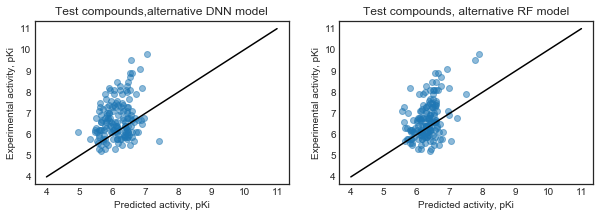

In [22]:
f = plt.figure(figsize=(10,3))

plt.style.use("seaborn-white")
fig1=f.add_subplot(121)
fig1.scatter(merge_df.pred_DNN_noPrimTar, merge_df.Activ, alpha=0.5)
fig1.plot([4,11], [4,11], c='black')
fig1.set_title("Test compounds,alternative DNN model")
fig1.set_xlabel("Predicted activity, pKi")
fig1.set_ylabel("Experimental activity, pKi")

fig2=f.add_subplot(122)
fig2.scatter(merge_df.pred_RF_noPrimTar, merge_df.Activ, alpha=0.5)
fig2.plot([4,11], [4,11], c='black')
fig2.set_title("Test compounds, alternative RF model")
fig2.set_xlabel("Predicted activity, pKi")
fig2.set_ylabel("Experimental activity, pKi")
f.show()